In [1]:
from default_values import *
import default_values
reload(default_values)

from functions_root_nparray import *
import functions_root_nparray
reload(functions_root_nparray)

from functions_correlations import *
import functions_correlations
reload(functions_correlations)

from functions_fragmentation import *
import functions_fragmentation
reload(functions_fragmentation)

import numpy as np
from numpy import geomspace
import math
import matplotlib
from cycler import cycler
matplotlib.rcParams['axes.prop_cycle'] = cycler(color='brgmcyk')

import matplotlib.pyplot as plt
%matplotlib inline

import ROOT

Welcome to JupyROOT 6.14/04
../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam/pPb_SE_L0_Correlation_GMB_Ratio.root
../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam/pp_SE_L0_Correlation_GMB_Ratio.root
pp File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam/pp_SE_L0_Correlation_GMB_Ratio.root
p-Pb File: ../InputData/zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam/pPb_SE_L0_Correlation_GMB_Ratio.root


In [2]:
print dPhi_Bins[ZYAM_Min_i]
print dPhi_Bins[ZYAM_Max_i]
print(pTbins)

0.589048622548
1.37444678595
[12, 40]


In [3]:
print pTbins
print zTbins

[12, 40]
[0.06  0.08  0.107 0.142 0.19  0.253 0.337 0.45  0.6  ]


**root to numpy**

In [4]:
Corrs = ROOT_to_nparray()
#print(Corrs["p-Pb_Uncorr_Estimate"][0][1])
#Plot_UB_Subtraction(Corrs)
#print_from_Dict(Corrs)

**Correlated Subtraction**: $C_S = \frac{C_{SR} \ \ - \ \ (1-p) C_{BR}}{p}$

In [5]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

In [6]:
#Plot_Sub_UB_Overlay(Corrs)

In [7]:
Correlated_Subtraction_Weights(Corrs)
#print_from_Dict(Corrs)

In [8]:
#Plot_UB()

**Pedestal Subtraction**

In [9]:
#print_from_Dict(Corrs)
#print(Corrs["pp_CSR"][0])
Plot = False
if Plot:
    for ipt in range(N_pT_Bins):
        for izt in range(NzT):
            fig = plt.figure(figsize=(8,7))
            #Cs_Correlations_Unsub_Overlay(delta_phi_centers, Corrs["pp_CSR"][0][izt],  Corrs["pp_CSR_Errors"][0][izt],UE_binmin=2, UE_binmax=9,label='data',color='black')
            GetRatio(Corrs["pp_CSR"][0][izt],Corrs["pp_CSR_Errors"][0][izt],Corrs["p-Pb_CSR"][0][izt],Corrs["p-Pb_CSR_Errors"][0][izt],delta_phi_centers)
            plt.annotate(r'%1.2f < $z_\mathrm{T}$ < %1.2f'%(zTbins[izt],zTbins[izt+1]), xy=(0.99, 0.01), xycoords='axes fraction', ha='right', va='bottom', fontsize=16)

            plt.savefig('pics/%s/%s/Befor_After_UE_pp-pPb_pT_%i_zT_%i.pdf'%(Shower,description_string,ipt,izt))

In [10]:
Ped_Sub_After_Cs(Corrs)

In [11]:
#Plot_pp_pPb_Cs(Corrs)
#Plot_pp_pPb_Cs_Individual(Corrs)
#Compare_Cs_pTBins()

**Debugging**

In [12]:
print("Number of Away side bins = %i"%(N_Phi_Integrate))

print(Corrs['pp_CSR'][0][3])

for SYS in Systems:
    print(SYS)
    vals = Corrs['%s_CSR'%(SYS)][0][3][-N_Phi_Integrate:] #2nd zT bin
    Integral = np.sum(vals)/(dPhi_Width*N_Phi_Integrate)

    val_errors = Corrs['%s_CSR_Errors'%(SYS)][0][3][-N_Phi_Integrate:]
    Integral_Err = math.sqrt(np.sum(val_errors**2))/(dPhi_Width*N_Phi_Integrate)

    UE_Error = Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]/(dPhi_Width*(ZYAM_Max_i-ZYAM_Min_i)) #is a scalar

    print("%f +\- %f +\- %f"%(Integral,Integral_Err,UE_Error))
    Total_Err = math.sqrt(Integral_Err**2 + UE_Error**2)
    print(Total_Err/Integral)
    
    print("non-dphi rate %1.3f"%(Corrs['%s_Uncorr_Error'%(SYS)][0][3][1]))

Number of Away side bins = 2
[-0.00309196  0.01109462 -0.00373142 -0.00323344  0.00357465 -0.00229581
  0.0019546   0.00339967  0.00116454  0.00052875  0.00772254  0.0042325
  0.00688358  0.021106    0.01920804  0.00813846]
pp
0.069637 +\- 0.021996 +\- 0.010161
0.34793692173227475
non-dphi rate 0.008
p-Pb
0.122798 +\- 0.022871 +\- 0.012091
0.21067466456184802
non-dphi rate 0.009


**Average Cs**: $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ in each $z_\mathrm{T}$ bin (i)

/Users/fernando/Library/Python/2.7/lib/python/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


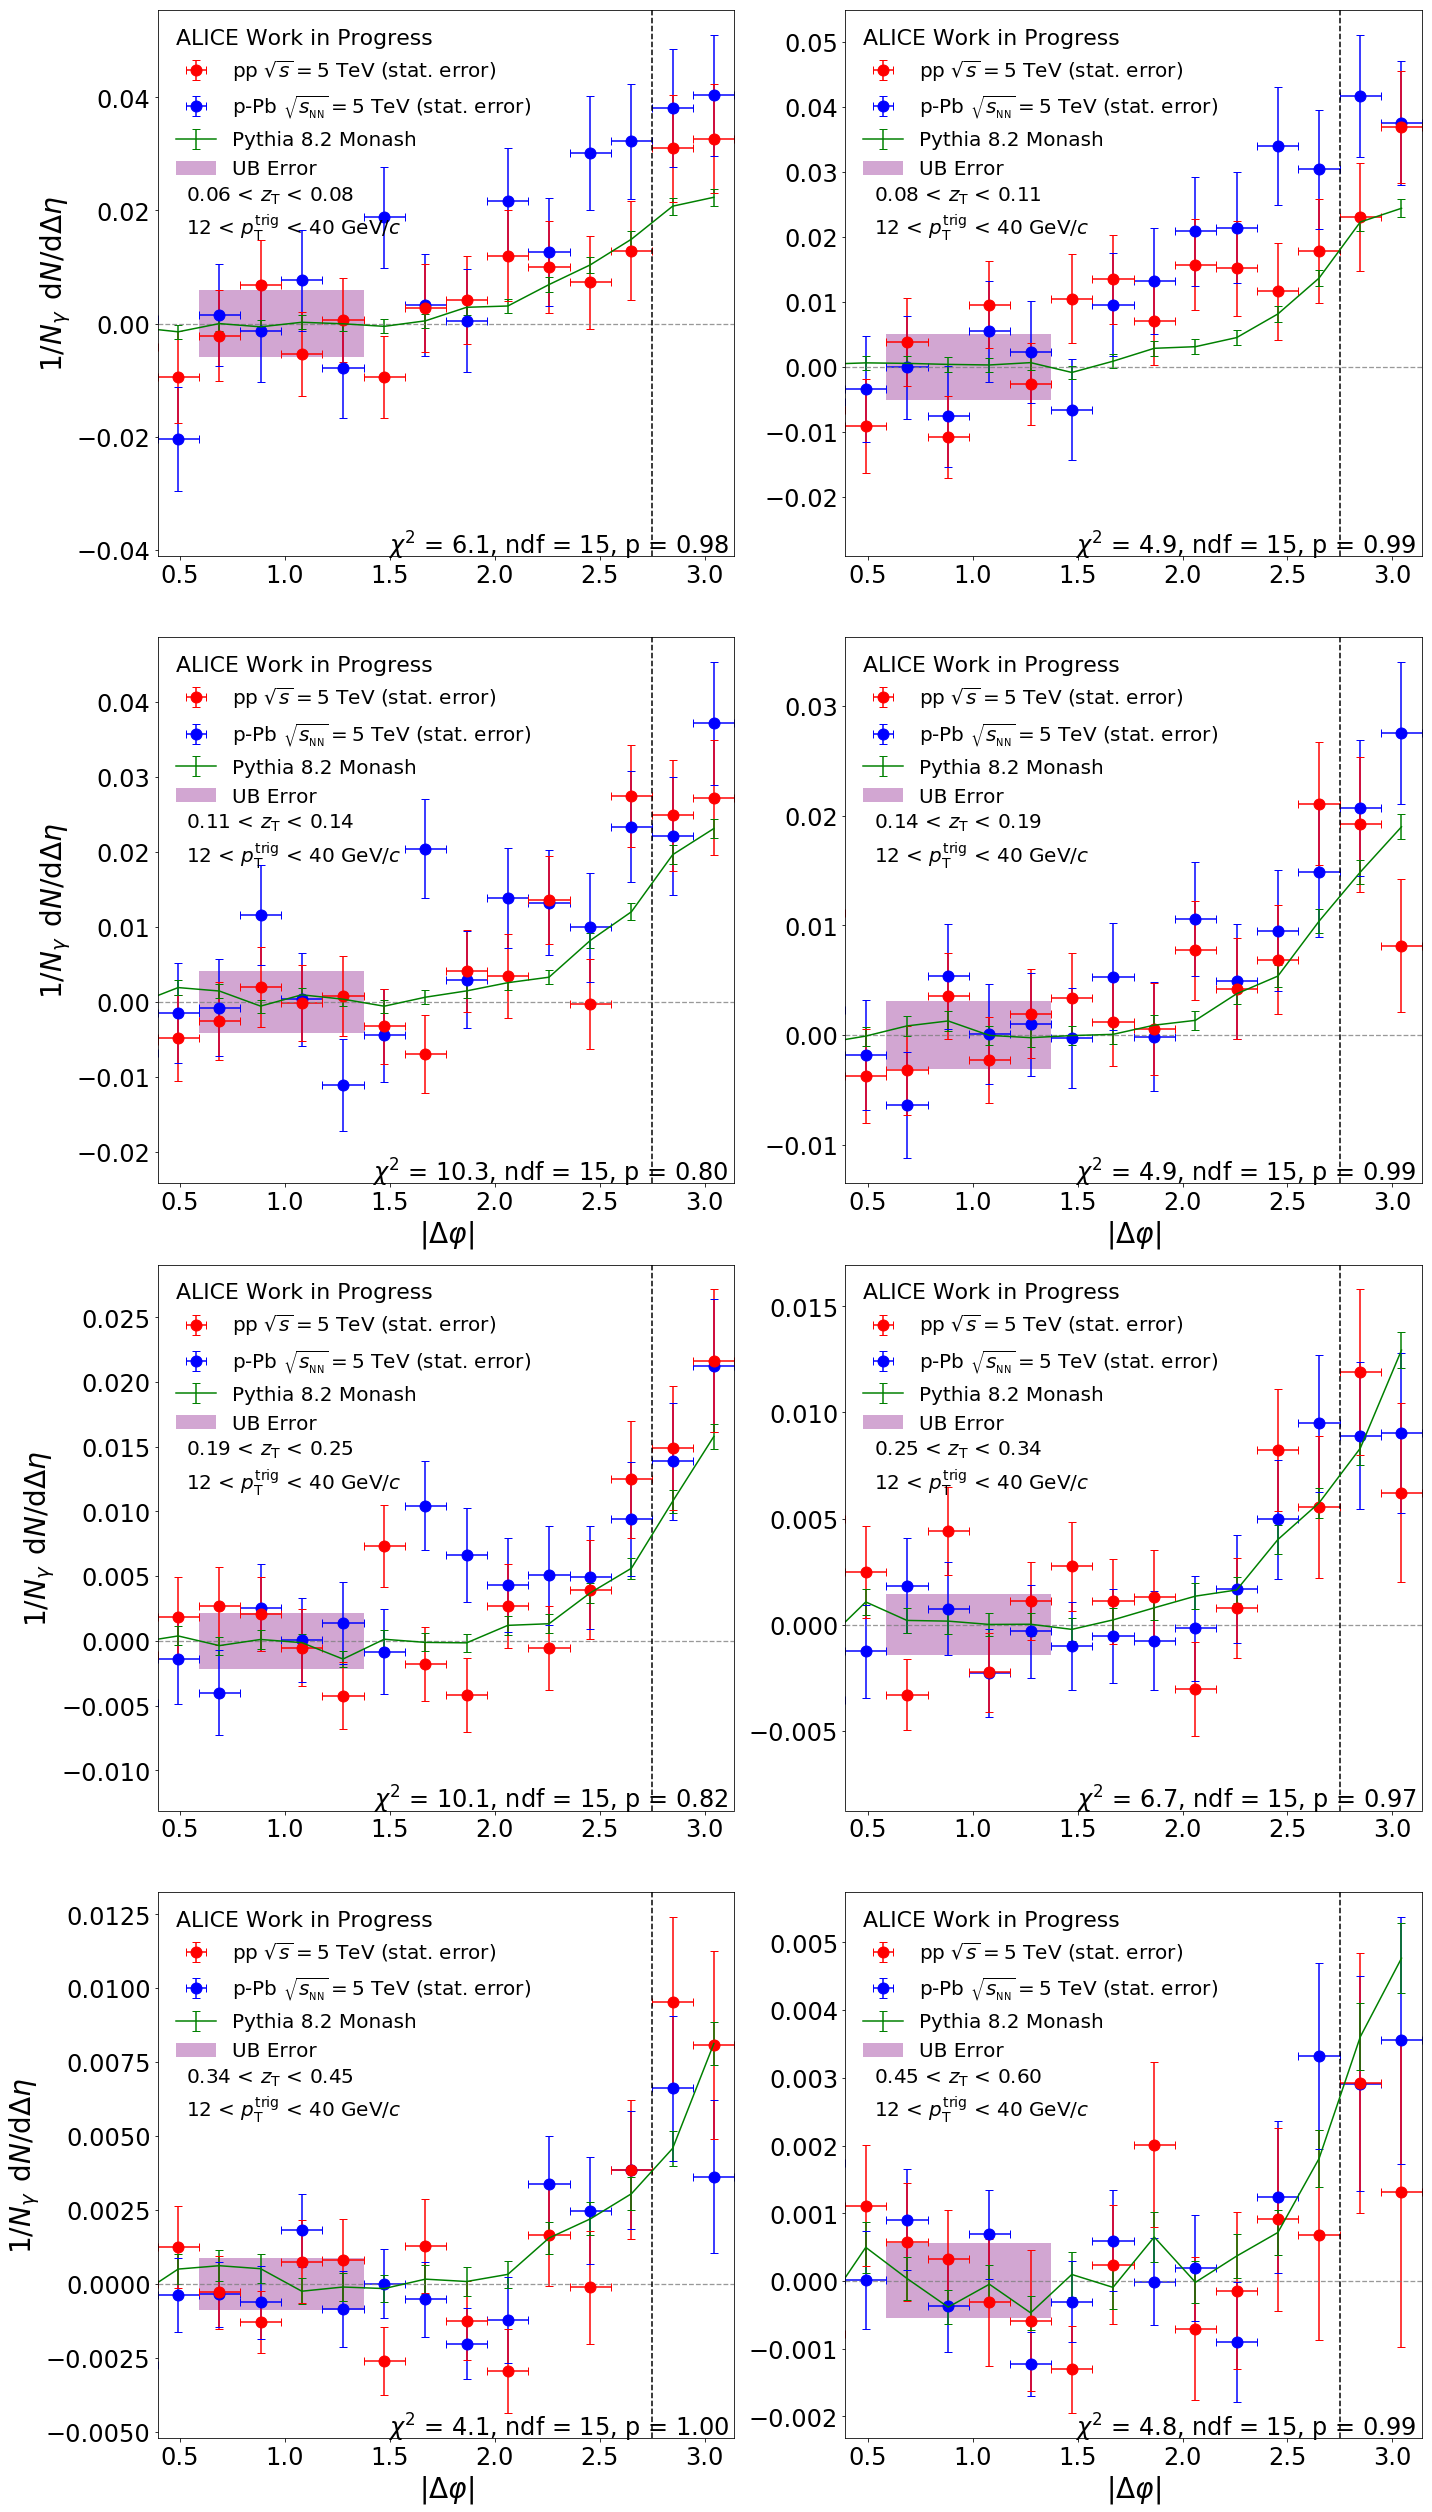

In [13]:
Avg_Corr = Cs_Weighted_Average(Corrs)
Plot_pp_pPb_Cs(Avg_Corr)
#Plot_pp_pPb_Cs_Individual(Avg_Corr)

In [14]:
Frags = Get_Fragmentation(Corrs)
#print(Frags["pp_FF_Errors"][0])
#print(Frags["pp_purity_FF_Errors"])
#for i in range(len(Frags["pp_FF"][0])):
#    print("%f"%(Frags["pp_FF_Errors"][0][i]/Frags["pp_FF"][0][i])),

In [15]:
reload(functions_fragmentation)
from functions_fragmentation import *

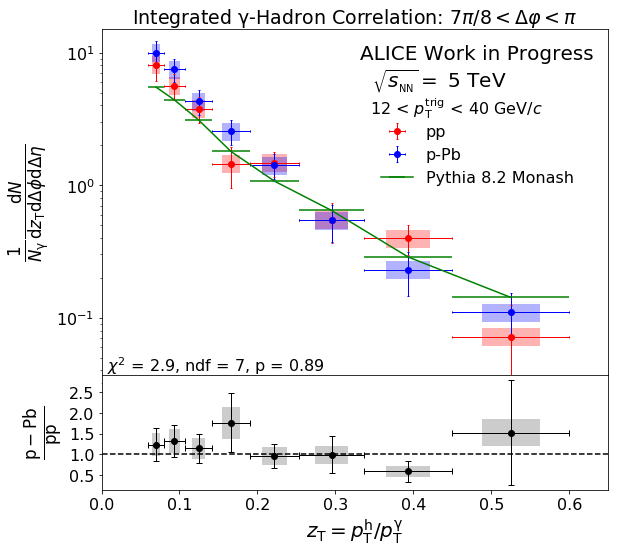

pp_purity_FF_Errors:
1.1939, 0.8321, 0.5576, 0.2138, 0.2176, 0.0809, 0.0584, 0.0106, 

p-Pb_FF_Errors:
2.2155, 1.4613, 0.9452, 0.5390, 0.3064, 0.1685, 0.0848, 0.0425, 

pp_FF:
8.1028, 5.6474, 3.7844, 1.4508, 1.4766, 0.5492, 0.3965, 0.0719, 

pp_FF_Errors:
1.9888, 1.2899, 0.8632, 0.5048, 0.3178, 0.1835, 0.1014, 0.0529, 

p-Pb_FF:
9.9846, 7.4682, 4.3097, 2.5583, 1.4202, 0.5436, 0.2306, 0.1098, 

p-Pb_purity_FF_Errors:
1.4712, 1.1004, 0.6350, 0.3770, 0.2093, 0.0801, 0.0340, 0.0162, 

zT Centers:
0.07, 0.09, 0.12, 0.17, 0.22, 0.30, 0.39, 0.53, 
zT Widths:
0.0100, 0.0135, 0.0175, 0.0240, 0.0315, 0.0420, 0.0565, 0.0750,


In [16]:
Combined_Frags = Average_FF(Frags)
#Plot_pp_pPb_Avg_FF(Combined_Frags)

Plot_pp_pPb_Avg_FF_and_Ratio(Combined_Frags)
print_from_Dict(Frags)
print("zT Centers:")
for izt in zT_centers:
    print("%1.2f,"%(izt)),
print("")
    
print("zT Widths:")
for izt in zT_widths:
    print("%1.4f,"%(izt)),

#Frags_Avg_Cs = Get_Fragmentation(Avg_Corr,True)
#print_from_Dict(Frags_Avg_Cs)
#Plot_pp_pPb_Avg_FF_and_Ratio(Frags_Avg_Cs)

zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam Intg. 7\pi/8  & $2.04 \pm 0.12$ & 1.24  & $2.22 \pm 0.11$ & 1.02  & $2.94/7\ 0.89 $\\


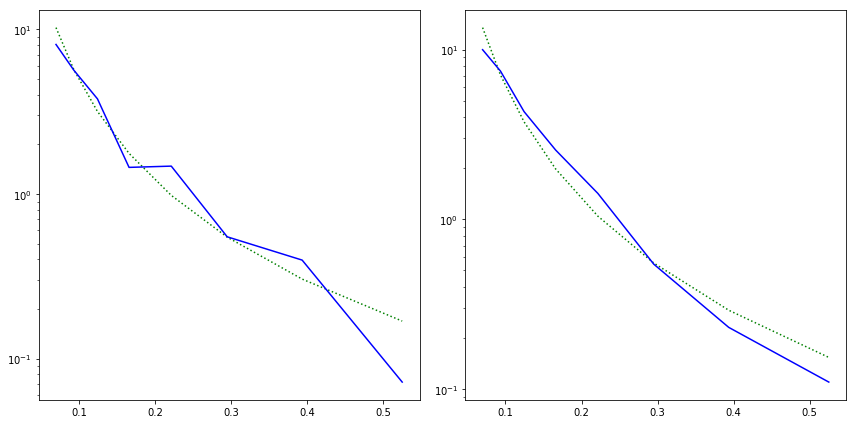

In [17]:
LaTeX_Table(Combined_Frags)

[0.28394941 0.23535549 0.19143868 0.15619527 0.13651661 0.13916981
 0.16306844 0.20076361 0.24599261 0.29531395 0.34698692 0.40010142
 0.45415196 0.50884033 0.56398102 0.61945325 0.67517531 0.73109007
 0.78715647 0.84334428]
1.09456775249


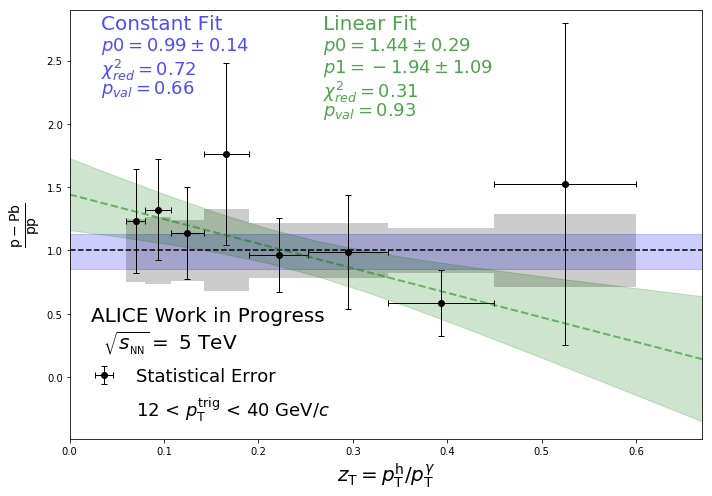

                Central Values:
[1.23224221 1.32240682 1.13881329 1.76339458 0.96182617 0.98979862
 0.58171242 1.52653497]

                Satistical Uncertainty Absolute:
[0.40772402 0.3977208  0.36036455 0.71725718 0.29308583 0.45103372
 0.26058409 1.26979409]

               Relative Satistical Uncertainty:
[0.33087977 0.30075525 0.31643866 0.40674798 0.30471809 0.45568231
 0.44796033 0.83181461]

                Ratio Uncertainty from Purity:
[0.23383084 0.2442902  0.22331006 0.29870007 0.20443976 0.20731822
 0.17046251 0.26889326]

                Ratio Uncertainty from Single Track Efficiency:
[0.08713268 0.09350828 0.08052626 0.12469083 0.06801138 0.06998933
 0.04113328 0.10794232]

                Full Systematic Uncertainty:
[0.24953751 0.26157503 0.23738547 0.32368123 0.21545571 0.21881351
 0.17535511 0.28975011]

****************************************
Minimizer is Linear
Chi2                      =      5.02667
NDf                       =            7
p0                  

In [18]:
pp_pPB_Avg_Ratio(Combined_Frags,0)
#pp_pPB_Avg_Ratio(Frags_Avg_Cs,0)

### Compare Different Integrations

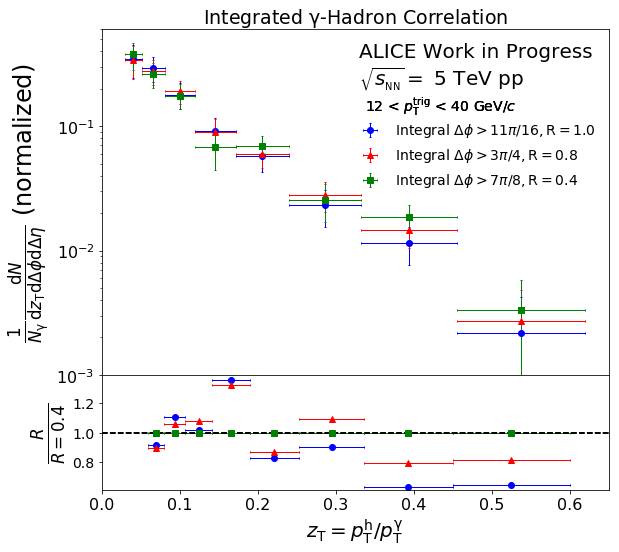

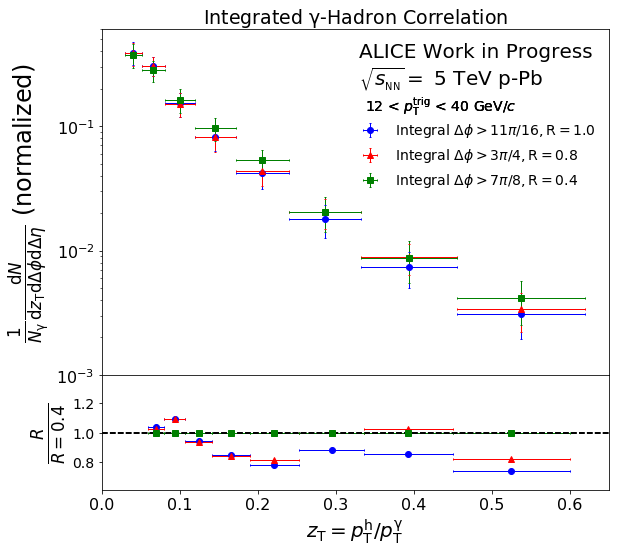

In [19]:
ranges = (1.9,2.15,2.7)
strings = ("11\pi/16, \mathrm{R} = 1.0","3\pi/4,\mathrm{R} = 0.8","7\pi/8, \mathrm{R} = 0.4","15\pi/16, \mathrm{R} = 0.2")

Compare_FF_Integration(ranges,strings)

In [20]:
reload(functions_fragmentation)
from functions_fragmentation import *

In [21]:
reload(functions_correlations)
import functions_correlations
from functions_correlations import *

zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
pT_Rebin_2_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_pT_Rebin_2_006zT06zTOldBinNewNewPurity.npy


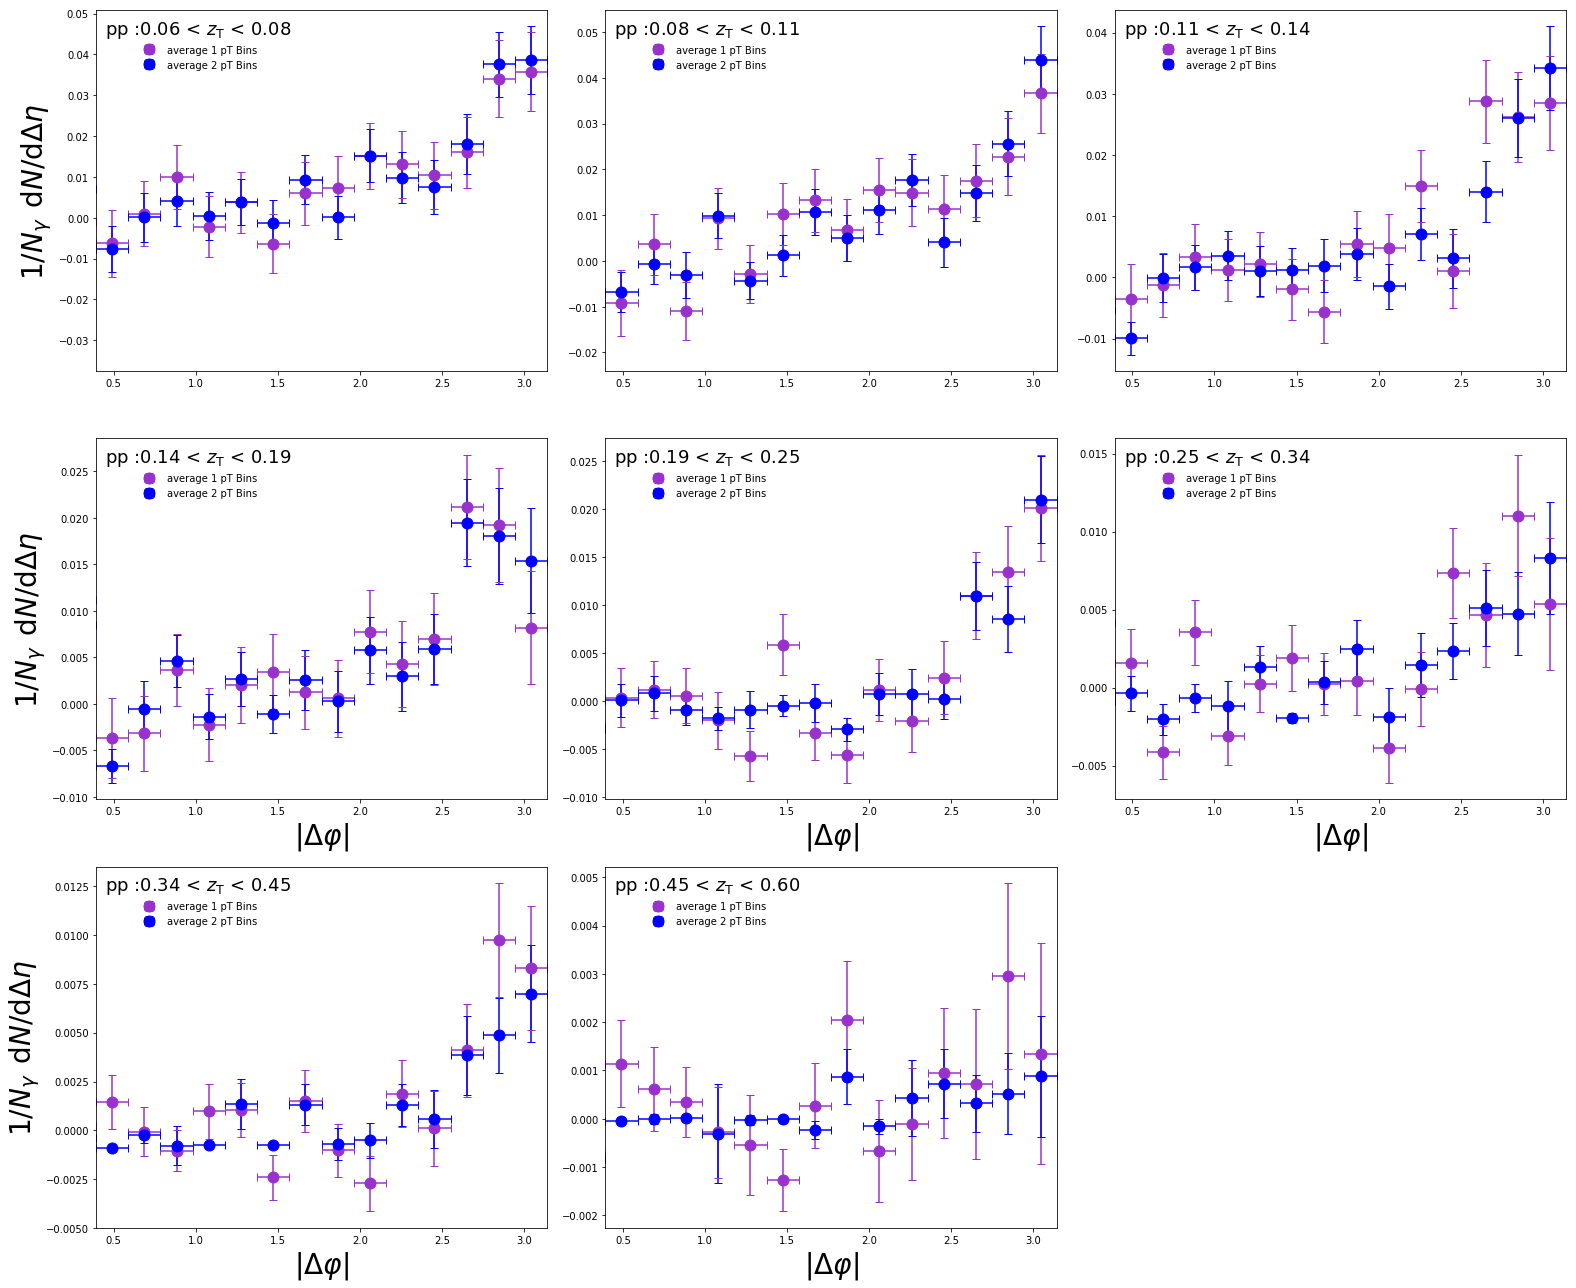

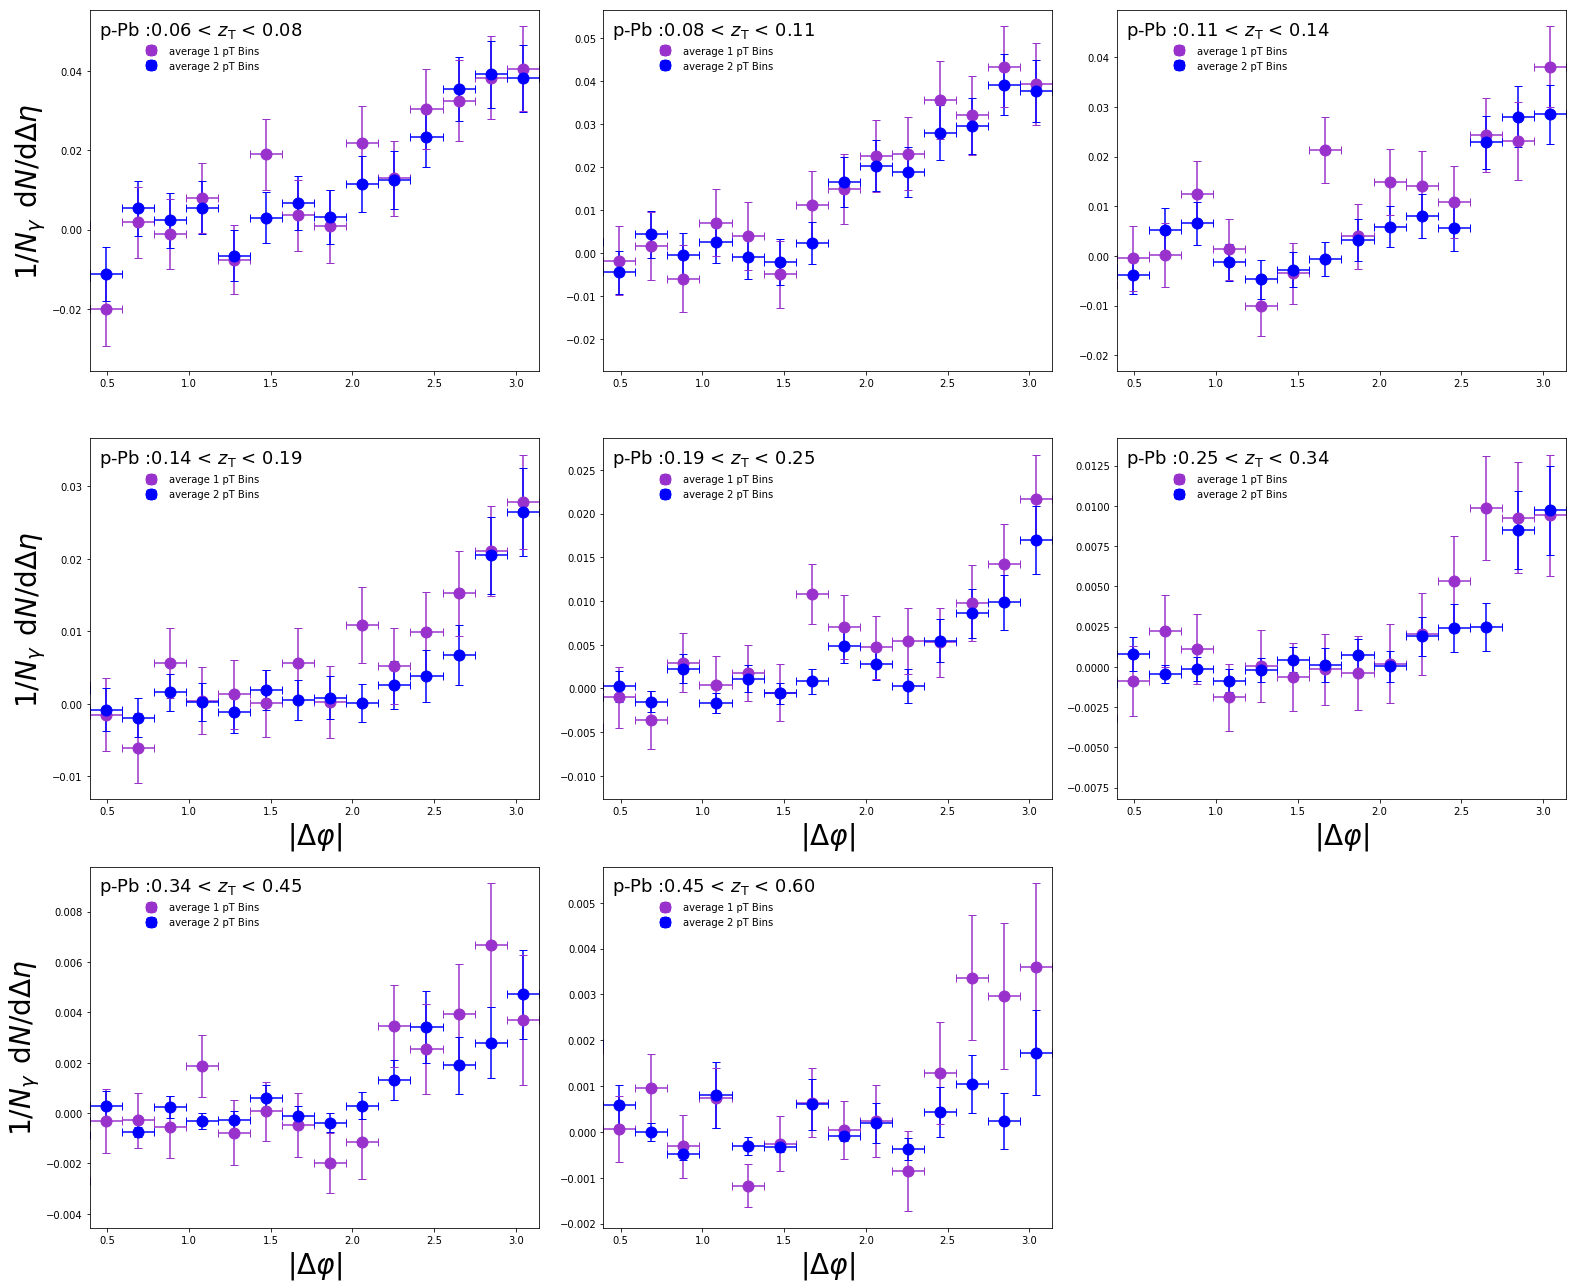

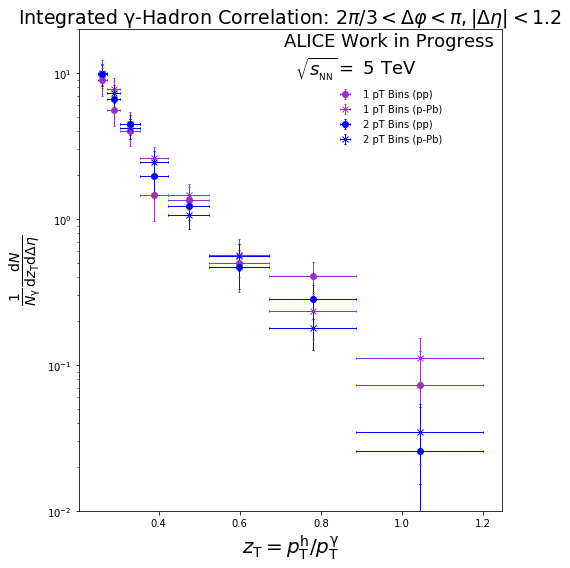

                Central Values:


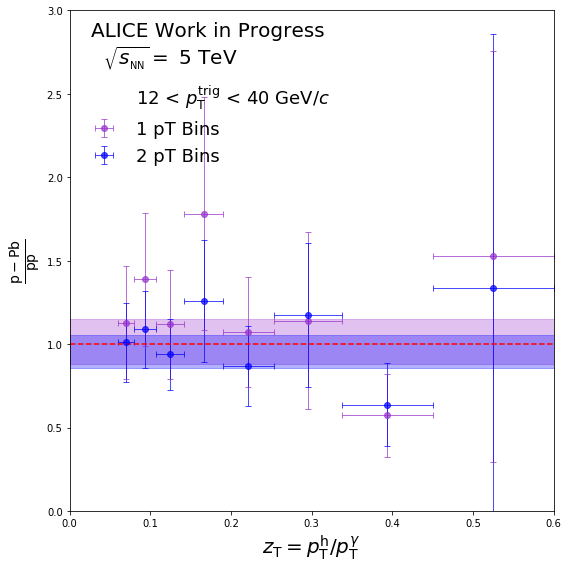

                Central Values:
[1.01093505 1.08854106 0.93861889 1.25833172 0.869122   1.17409343
 0.63776337 1.33439492]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    

****************************************
Minimizer is Linear
Chi2                      =      3.14836
NDf                       =            7
p0                        =     0.956749   +/-   0.0976632   


In [22]:
save_name = "pT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","pT_Rebin_2_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["1 pT Bins","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zTOldBinNewNewPurity
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zTOldBinNewNewPurity.npy
zT_Rebin_7_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_7_006zT06zT.npy
zT_Rebin_9_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy
loading npy_files/LO_p-Pb_Averaged_Fragmentation_Functions_Errors_zT_Rebin_9_006zT06zT.npy


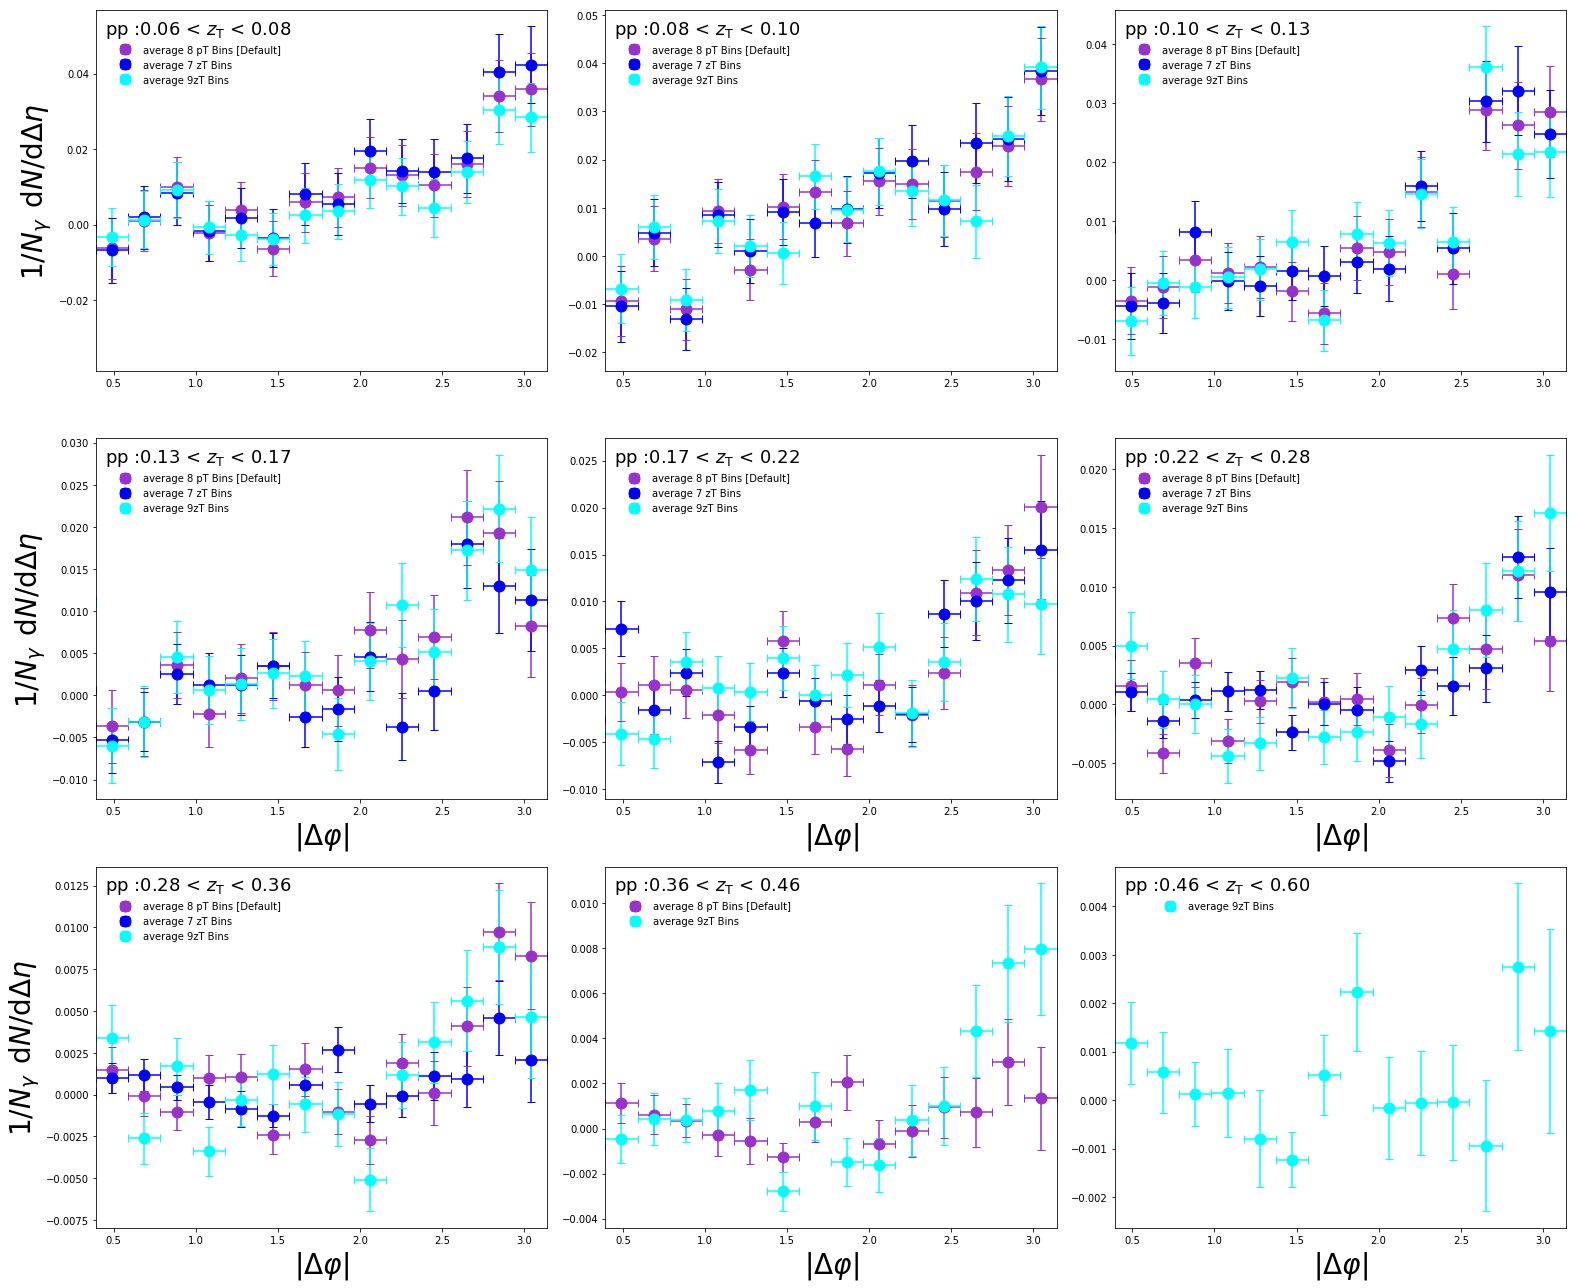

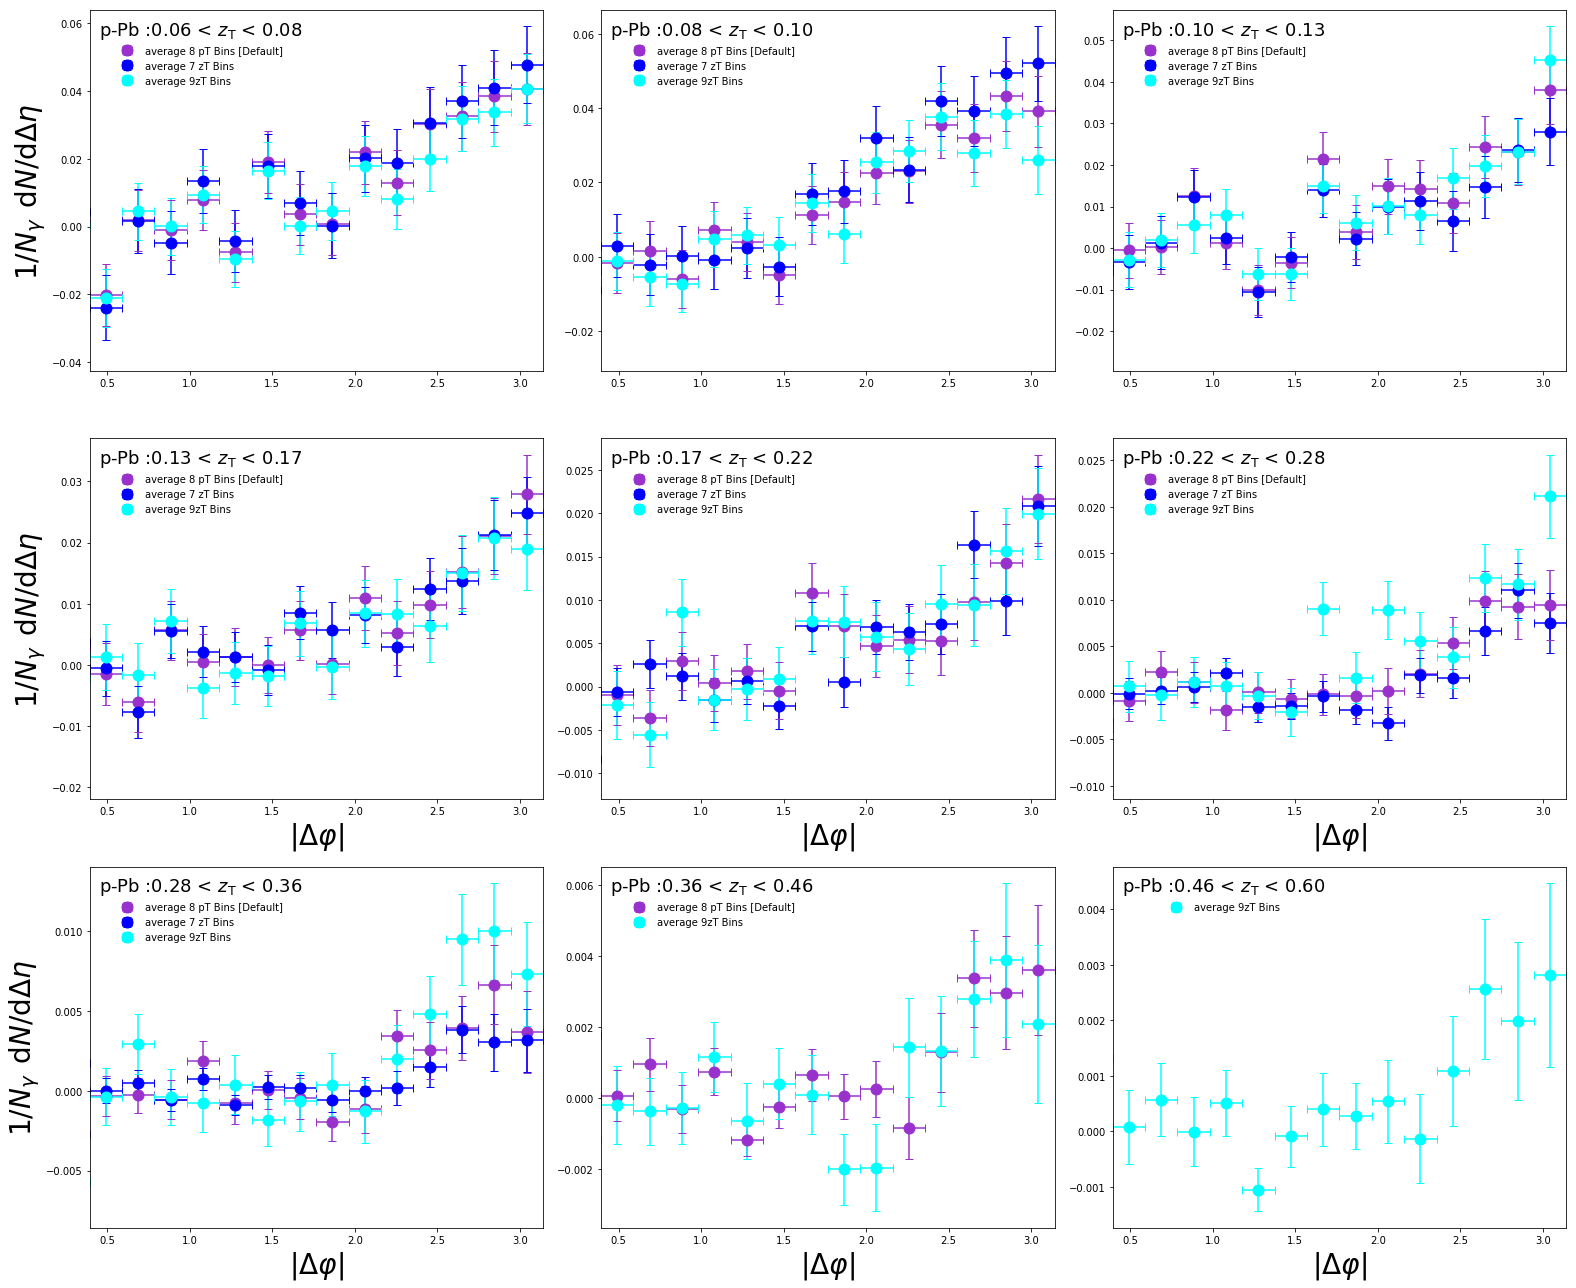

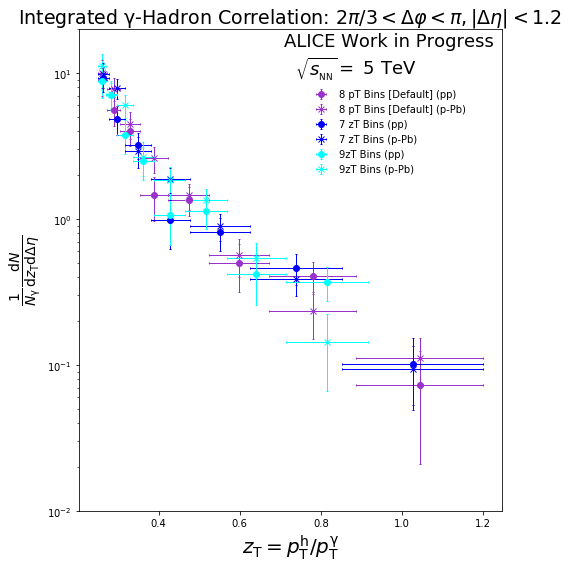

                Central Values:


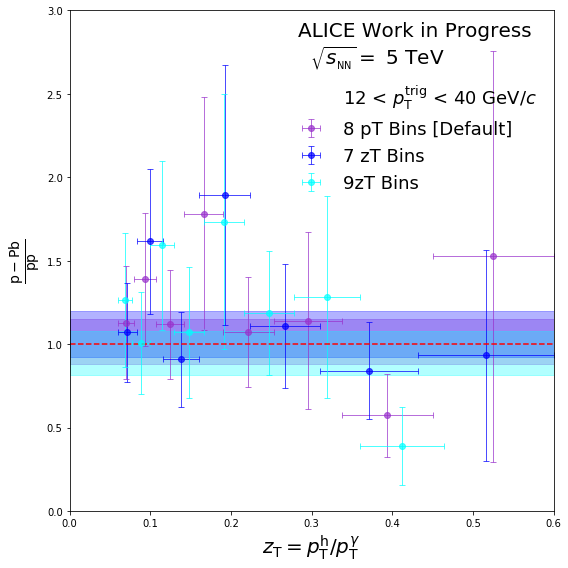

                Central Values:
[1.26432146 1.00883928 1.59188485 1.07046074 1.73434792 1.18782758
 1.28530072 0.38923048 1.15312974]

****************************************
Minimizer is Linear
Chi2                      =      5.71077
NDf                       =            7
p0                        =      1.01644   +/-   0.133719    

****************************************
Minimizer is Linear
Chi2                      =      3.70791
NDf                       =            6
p0                        =      1.06003   +/-   0.137798    

****************************************
Minimizer is Linear
Chi2                      =      9.92142
NDf                       =            8
p0                        =     0.946562   +/-   0.130805    


In [23]:
save_name = "zT_Comparison"
strings = ["zT_Rebin_8_006zT06zTOldBinNewNewPurity","zT_Rebin_7_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["8 pT Bins [Default]","7 zT Bins", "9zT Bins"]
colors = ["darkorchid","blue","cyan","red"]
Compare_Cs_Averages(save_name,strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

In [24]:
save_name = "ZYAM_Variation"
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity_Small_Zyam"]
string_descriptions = ["Default","Smaller ZYAM Avg Range"]
colors = ["darkorchitd","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(save_name,strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(save_name,strings,string_descriptions,colors,True,False)

zT_Rebin_8_006zT06zT
loading npy_files/LO_pp_Averaged_Fragmentation_Functions_Errors_zT_Rebin_8_006zT06zT.npy


ValueError: Invalid RGBA argument: 'd'

Error in callback <function post_execute at 0x129d590c8> (for post_execute):


ValueError: Invalid RGBA argument: 'darkorchitd'

ValueError: Invalid RGBA argument: 'darkorchitd'

In [ ]:
strings = ["zT_Rebin_7_006zT06zT","zT_Rebin_8_006zT06zT","zT_Rebin_9_006zT06zT"]
string_descriptions = ["7 zT Bins","8 zT Bins","9 zT Bins","4 pT Bins"]

strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTOldBinNewNewPurity"]
string_descriptions = ["Old","New"]

colors = ["red","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

## Compare Different pT Binning

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_2_pDevNONE"]
string_descriptions = ["1 pT Bins","2 pT Bins","3 pT Bins","4 pT Bins"]
colors = ["darkorchid","blue","cyan","red"]
#Compare_Cs_Averages(strings,string_descriptions,colors)
#Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors) 
#Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,True)

Propagate Absolute Uncertianty arising from purity: $ C_s = \frac{A}{p} \rightarrow \frac{\Delta C_s}{Cs} = \frac{\Delta p}{p}$

## p-Pb / pp

**Weigthed Average:** $\frac{\sum_{i=1}^{n}x_i / \sigma_i^2}{\sum_{i=1}^{n}1/\sigma_i^2}$ where weight $w_i = \frac{1}{\sigma_i^2} $ and $\sigma_i = \sqrt{\sigma_{i,stat_{rel}}^2 + \sigma_{i,purity_{rel}}^2}$ , in each $z_\mathrm{T}$ bin (i). **Important:** The relative uncertainties are used in weighting

In [ ]:
pp_pPB_Avg_Ratio(Combined_Frags,0)

In [ ]:
reload(functions_fragmentation)
from functions_fragmentation import *
strings = ["zT_Rebin_8_006zT06zT","zT_Rebin_8_006zT06zTpT2"]
string_descriptions = ["1 pT Bin","2 pT Bins"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,True,False)

In [ ]:
strings = ["pT_Rebin_1_pDevNONE","pT_Rebin_1_pDevPlus","pT_Rebin_1_pDevMinus","pT_Rebin_1_90p"]
string_descriptions = ["Cetral Purity","Purity Plus STDV","Purity Minus STDV","purity = 90%"]
colors = ["darkorchid","blue","cyan","red",]
Compare_pp_pPB_Avg_lists(strings,string_descriptions,colors)
Compare_pp_pPB_Avg_Ratio_lists(strings,string_descriptions,colors,False,False)